In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [3]:
PATH = Path('data')
list(PATH.iterdir())

[PosixPath('data/test_supplement.csv'),
 PosixPath('data/train.csv'),
 PosixPath('data/sample_submission.csv'),
 PosixPath('data/train_sample.csv'),
 PosixPath('data/test.csv')]

In [4]:
df = pd.read_csv(PATH/ 'train_sample.csv')

In [5]:
df.shape

(100000, 8)

In [6]:
df.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0
99999,119349,14,1,15,401,2017-11-07 14:32:27,NaN,0


In [7]:
df.nunique()

ip                 34857
app                  161
device               100
os                   130
channel              161
click_time         80350
attributed_time      227
is_attributed          2
dtype: int64

In [8]:
clicktime = pd.to_datetime(df.click_time)

In [9]:
clicktime.describe()

count                  100000
unique                  80350
top       2017-11-08 12:01:02
freq                        7
first     2017-11-06 16:00:00
last      2017-11-09 15:59:51
Name: click_time, dtype: object

# Fact
- IPs are encoded. 50% of all events are generated by 3 IP addresses

# TODO

- Some channels are highly correlated to is_attributed 1. Find out which channels

- High Collinear features between some channel-app, os-device, channel-device. Remove them
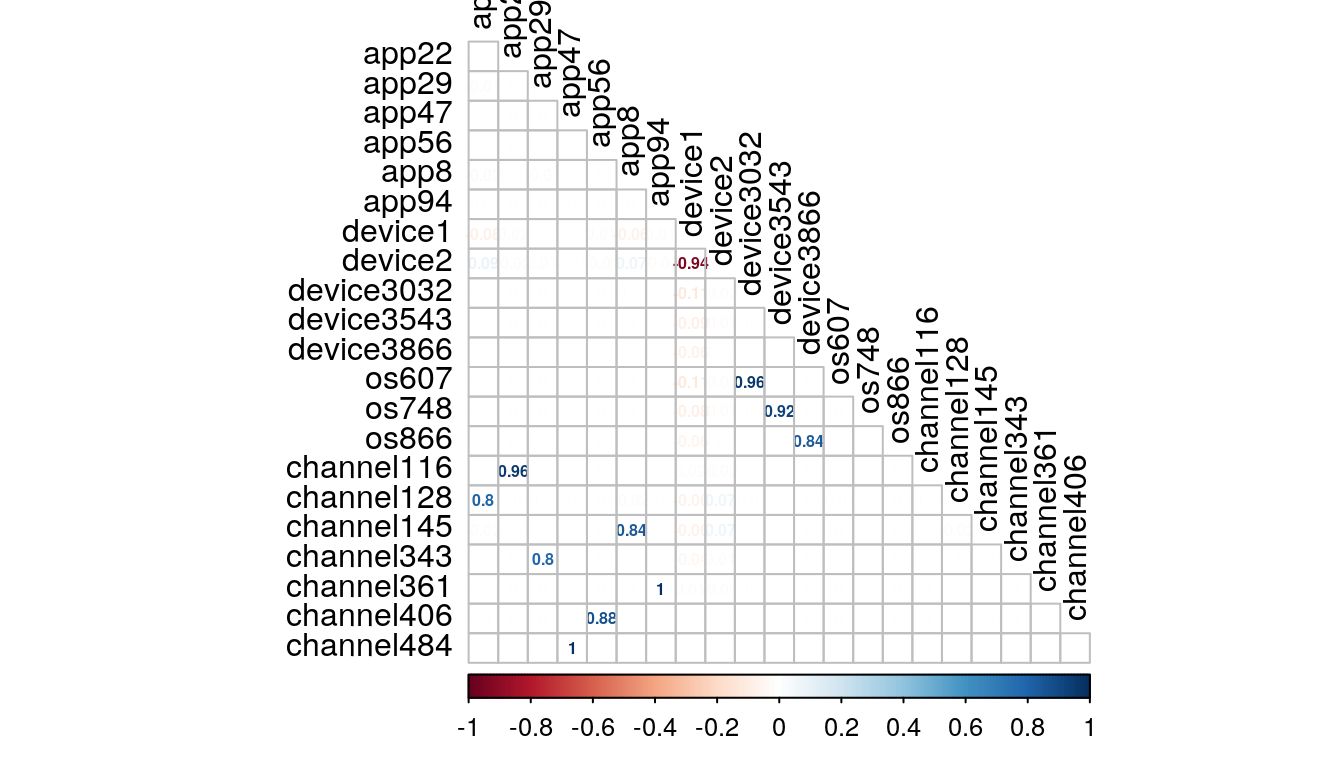

- 

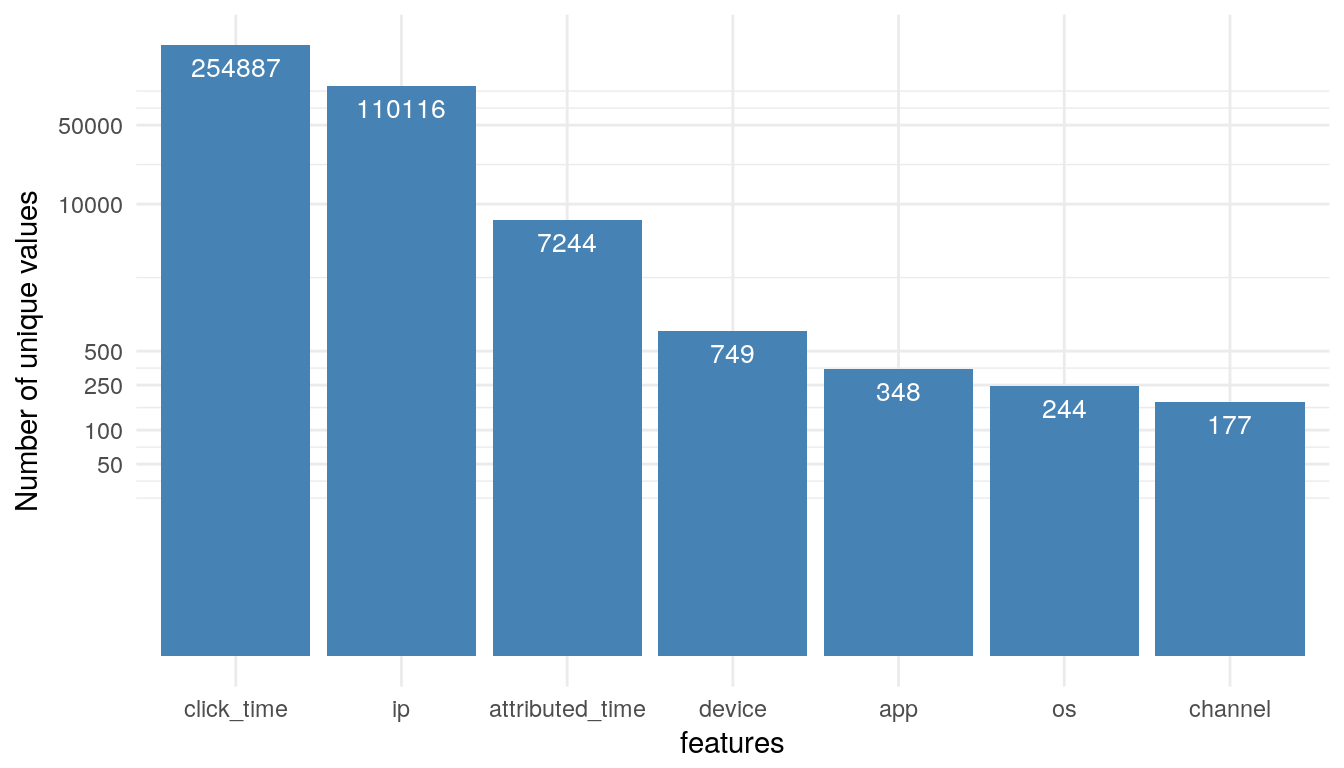
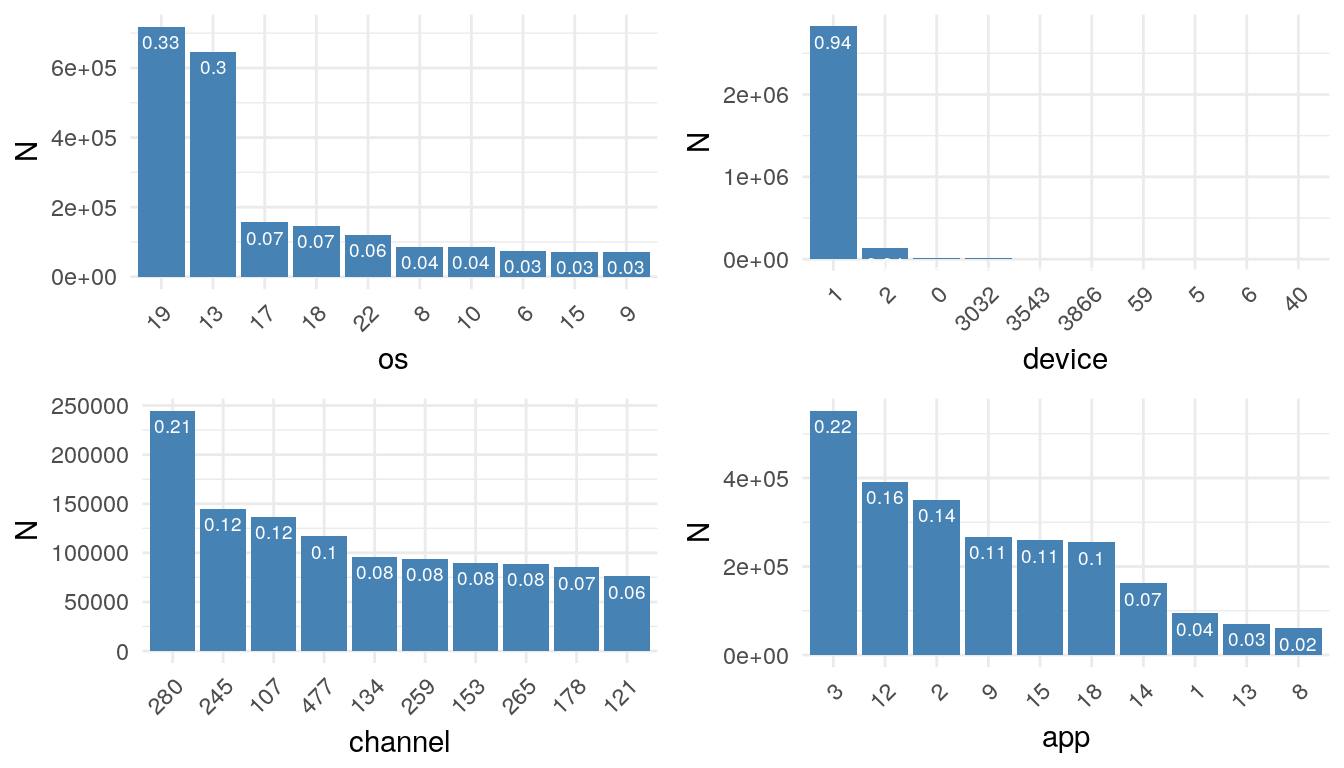


# ---------------------------------------------------

In [12]:
test = pd.read_feather(PATH/'test.feather')

In [13]:
test.head()
test.shape

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


(18790469, 7)

In [14]:
test.click_time = pd.to_datetime(test.click_time)

In [15]:
test.click_time.describe()

count                18790469
unique                  21603
top       2017-11-10 09:00:10
freq                     1466
first     2017-11-10 04:00:00
last      2017-11-10 15:00:00
Name: click_time, dtype: object

# Preprocessing TODO

In [17]:
df.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0
99999,119349,14,1,15,401,2017-11-07 14:32:27,NaN,0


Optimization: <br>
Take last 25% of dataset (last 45 mil rows out of ~185 mil rows). 
```
train_columns = ['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed']
test_columns  = ['ip', 'app', 'device', 'os', 'channel', 'click_time', 'click_id']

total_rows = 184903980
train = pd.read_csv(path+"train.csv", skiprows=range(1,total_rows-61mils + 1, nrows=61000000, usecols=train_columns, dtype=dtypes)


```
Also look for memory efficient code: https://www.kaggle.com/aharless/jo-o-s-xgboost-with-memory-usage-enhancements

Less-mem data type:
```

dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        'click_id'      : 'uint32'
        }
```

New feature

https://www.kaggle.com/nanomathias/feature-engineering-importance-testing

- Clicktime most and least freq hours (in test_data?)
- Clicktime day/hour/minute/second
- Confidence Rates
- Groupby: 

```
Grouping by ['ip', 'app', 'channel'], and aggregating day with var
Grouping by ['ip', 'app', 'os'], and aggregating hour with var
Grouping by ['ip', 'day', 'channel'], and aggregating hour with var
Grouping by ['ip', 'day', 'hour'], and aggregating channel with count (*)
Grouping by ['ip', 'app'], and aggregating channel with count (*)
Grouping by ['ip', 'app', 'os'], and aggregating channel with count (*)
Grouping by ['ip', 'app', 'day', 'hour'], and aggregating channel with count (*)
Grouping by ['ip', 'app', 'channel'], and aggregating hour with mean (*)
Grouping by ['app'], and aggregating ip with AvgViewPerDistinct (*)
Grouping by ['app'], and aggregating channel with count (*)
Grouping by ['channel'], and aggregating app with count (*)

Grouping by ['ip'], and aggregating channel with count (?)
```
- ... and a lot more from the kaggle kernel


- Groupby:
https://www.kaggle.com/krishnakesavan/r-lgbm-single-model-40m-rows-lb-0-9736

```
Grouping by ['ip', 'device','os'], and just count them
Grouping by ['ip', 'device','os'], and running count (first time its 1, next time its 2: df.groupby(['a','b'],as_index=False).cumcount()+1
Grouping by ['ip', 'device','os','app'] and count them
Grouping by ['ip', 'device','os','app'] and running count
```

- One boolean feature: https://www.kaggle.com/aroragaurav/single-model-by-pranav-hitting-0-9701/code
```
most_freq_hours_in_test_data <- c("4","5","9","10","13","14")
least_freq_hours_in_test_data <- c("6","11","15")

```

- Deal with imbalance class

https://www.kaggle.com/kailex/talkingdata-eda-and-class-imbalance
https://www.kaggle.com/pranav84/lightgbm-fixing-unbalanced-data-lb-0-9680

- Validation
https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/discussion/51492
